<a href="https://colab.research.google.com/github/abdullatif14/Decision_Trees_and_svm_week8/blob/main/Decision_Trees_and_Support_Vector_Machines_IP_Week8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Questions

##a)Specifying the questions
Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

##b)Defining the metric for success
•Data cleaning(outliers and missing values)

•Univariate analysis

•Bivariate analysis

•Implementing the Solution

•Recommendations

##c)Understanding the context

The data provided is about a destructive disease known as hypothyroid. This is a Hypothyroidism's deficiency of thyroid hormones which can disrupt things like heart rate, body temperature and all aspects of metabolism.

Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

So we are going to build a model to assist the Nairobi Hospital overcome some of the challenges treating patients with Hypothroid.

##d)Recording the experimental design
1.Exploratory Data Analysis

2.Checking Multicollinearity

3.Feature Engineering

4.Optimizing Decision Trees

5.Support Vector Machines

6.Evaluating the model

7.Prediction



#Reading and Data Cleaning

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#laoding the dataset
hyp = pd.read_csv('hypothyroid.csv')
hyp.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


__Data Preparation__

In [5]:
hyp.shape

(3163, 26)

In [6]:
# Lets check for missing values
hyp.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [3]:
# lets check if the data has the right data types

hyp.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [7]:
#converting numerical cols
hyp.age = pd.to_numeric(hyp.age, errors='coerce')
hyp.TSH = pd.to_numeric(hyp.TSH, errors='coerce')
hyp.T3 = pd.to_numeric(hyp.T3, errors='coerce')
hyp.TT4 = pd.to_numeric(hyp.TT4, errors='coerce')
hyp.T4U = pd.to_numeric(hyp.T4U, errors='coerce')
hyp.FTI = pd.to_numeric(hyp.FTI, errors='coerce')
hyp.TBG = pd.to_numeric(hyp.TBG, errors='coerce')

In [5]:
#lets see if it has changed
hyp.dtypes

status                        object
age                          float64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
TBG                          float64
dtype: object

In [8]:
hyp.nunique()

status                         2
age                           92
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          268
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

In [9]:
hyp.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000,260.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771,31.283077
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572,19.224659
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000,21.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000,28.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000,34.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000,122.000000


**Univariate analysis**

<Figure size 1440x1152 with 0 Axes>

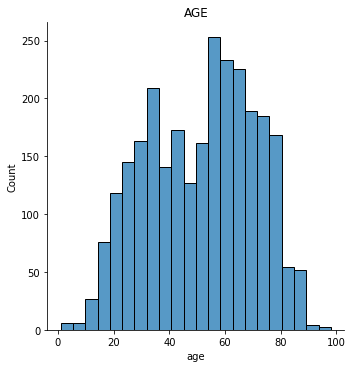

<Figure size 432x288 with 0 Axes>

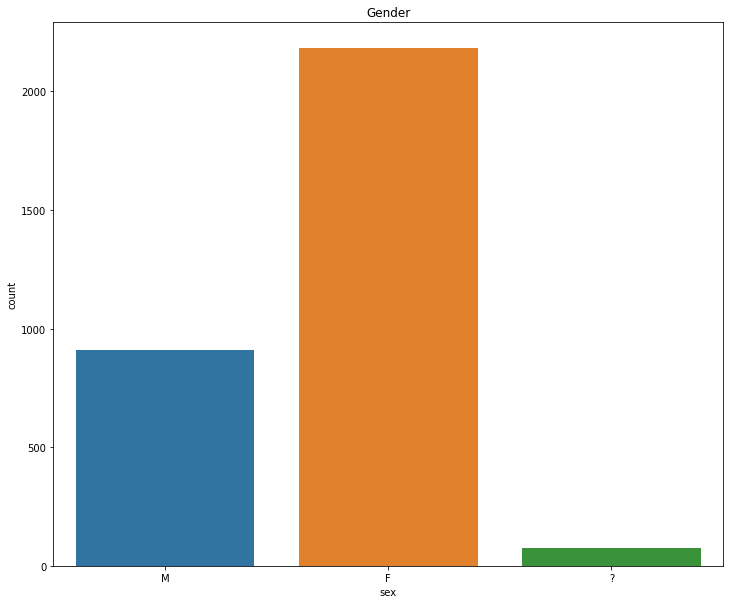

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

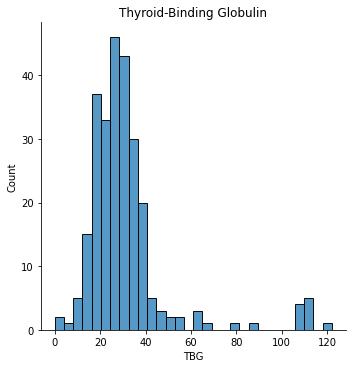

<Figure size 432x288 with 0 Axes>

<Figure size 1440x1152 with 0 Axes>

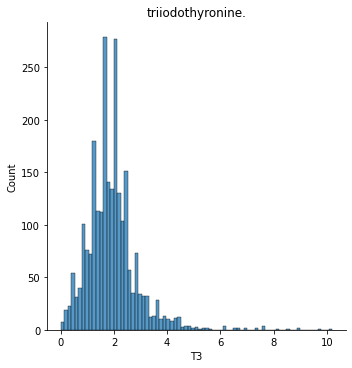

<Figure size 432x288 with 0 Axes>

In [10]:

# lets plot some of the variables in  histogram
plt.figure(figsize = [20,16])
sns.displot(hyp['age'])
plt.title('AGE')
plt.show()
plt.savefig('age.png')

plt.figure(figsize = [12,10])
sns.countplot(x='sex',data=hyp)
plt.title('Gender')
plt.show()
plt.savefig('sex.png')

plt.figure(figsize = [20,16])
sns.displot(hyp['TBG'])
plt.title('Thyroid-Binding Globulin')
plt.show()
plt.savefig('TBG.png')

plt.figure(figsize = [20,16])
sns.displot(hyp['T3'])
plt.title('triiodothyronine.')
plt.show()
plt.savefig('T3.png')




**Bivariate Analysis**

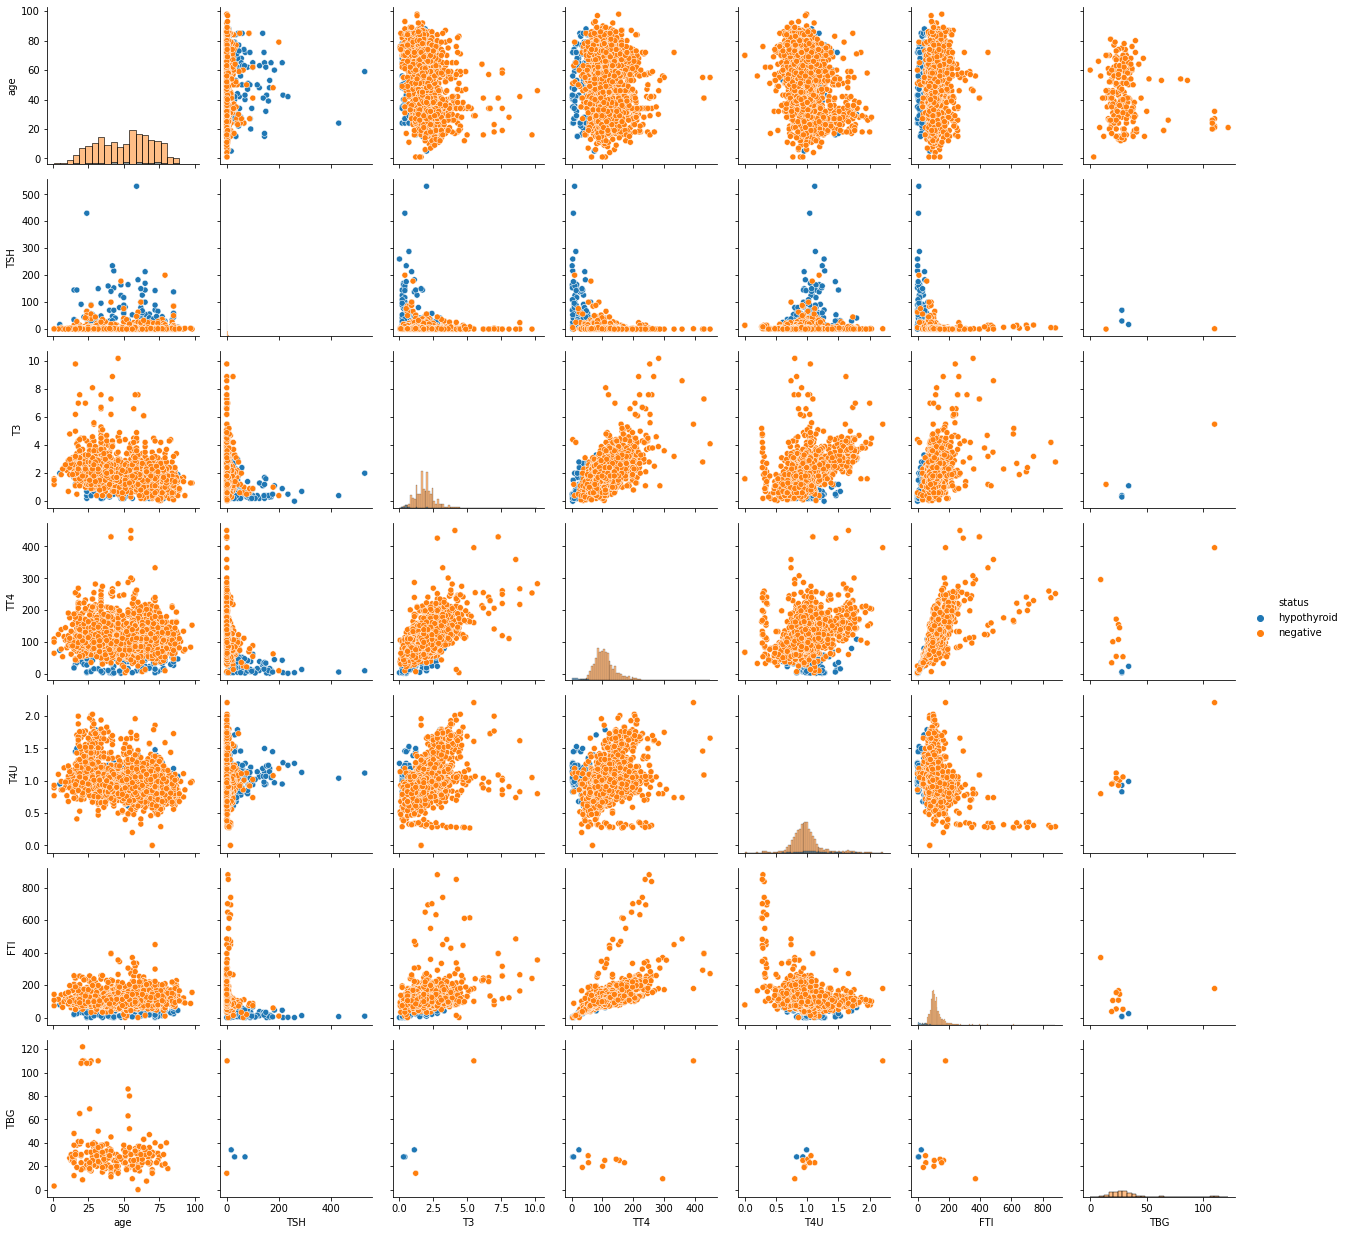

In [16]:
g = sns.PairGrid(hyp, hue="status")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

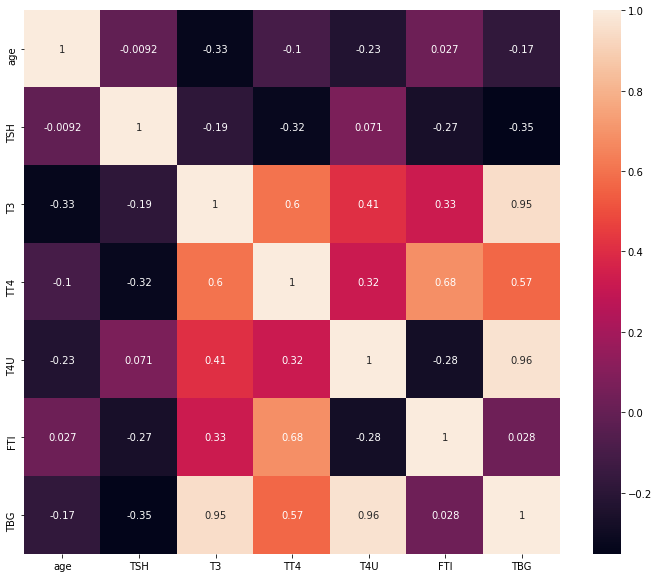

In [11]:

# correlation heat map
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(hyp.corr(),annot=True)
plt.show()

#Decision Trees

__Random Forest__

In [11]:
# lets change some of the variables to numericals

#Encoding the categories
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
hyp['status'] = le.fit_transform(hyp['status'])
hyp['sex'] = le.fit_transform(hyp['sex'])
hyp['on_thyroxine'] = le.fit_transform(hyp['on_thyroxine'])
hyp['query_on_thyroxine'] = le.fit_transform(hyp['query_on_thyroxine'])
hyp['on_antithyroid_medication'] = le.fit_transform(hyp['on_antithyroid_medication'])
hyp['thyroid_surgery'] = le.fit_transform(hyp['thyroid_surgery'])
hyp['query_hypothyroid'] = le.fit_transform(hyp['query_hypothyroid'])
hyp['query_hyperthyroid'] = le.fit_transform(hyp['query_hyperthyroid'])
hyp['pregnant'] = le.fit_transform(hyp['pregnant'])
hyp['sick'] = le.fit_transform(hyp['sick'])
hyp['tumor'] = le.fit_transform(hyp['tumor'])
hyp['lithium'] = le.fit_transform(hyp['lithium'])
hyp['goitre'] = le.fit_transform(hyp['goitre'])
hyp['TSH_measured'] = le.fit_transform(hyp['TSH_measured'])
hyp['T3_measured'] = le.fit_transform(hyp['T3_measured'])
hyp['TT4_measured'] = le.fit_transform(hyp['TT4_measured'])
hyp['T4U_measured'] = le.fit_transform(hyp['T4U_measured'])
hyp['FTI_measured'] = le.fit_transform(hyp['FTI_measured'])
hyp['TBG_measured'] = le.fit_transform(hyp['TBG_measured'])

In [10]:
#Lets check for null values in our dataset
hyp.isnull().sum()

status                          0
age                           446
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

In [12]:
np.any(np.isnan(hyp))

True

In [13]:
hyp.fillna(0, inplace=True)

In [14]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone has thyroid or not, so let's use that column as our Y 
y = hyp['status'].values

test_features = hyp.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later,
# we only pick a few.
X = hyp[test_features].values


# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,949.000000,949.000000
mean,0.958904,0.954678
std,0.198617,0.193365
min,0.000000,0.000120
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [15]:
#Lets see how well our random forest is doing
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#This is the result after choosing 500 random trees

Mean Absolute Error: 0.01680969735616431
Mean Squared Error: 0.010891984352114177
Root Mean Squared Error: 0.10436467003787334


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


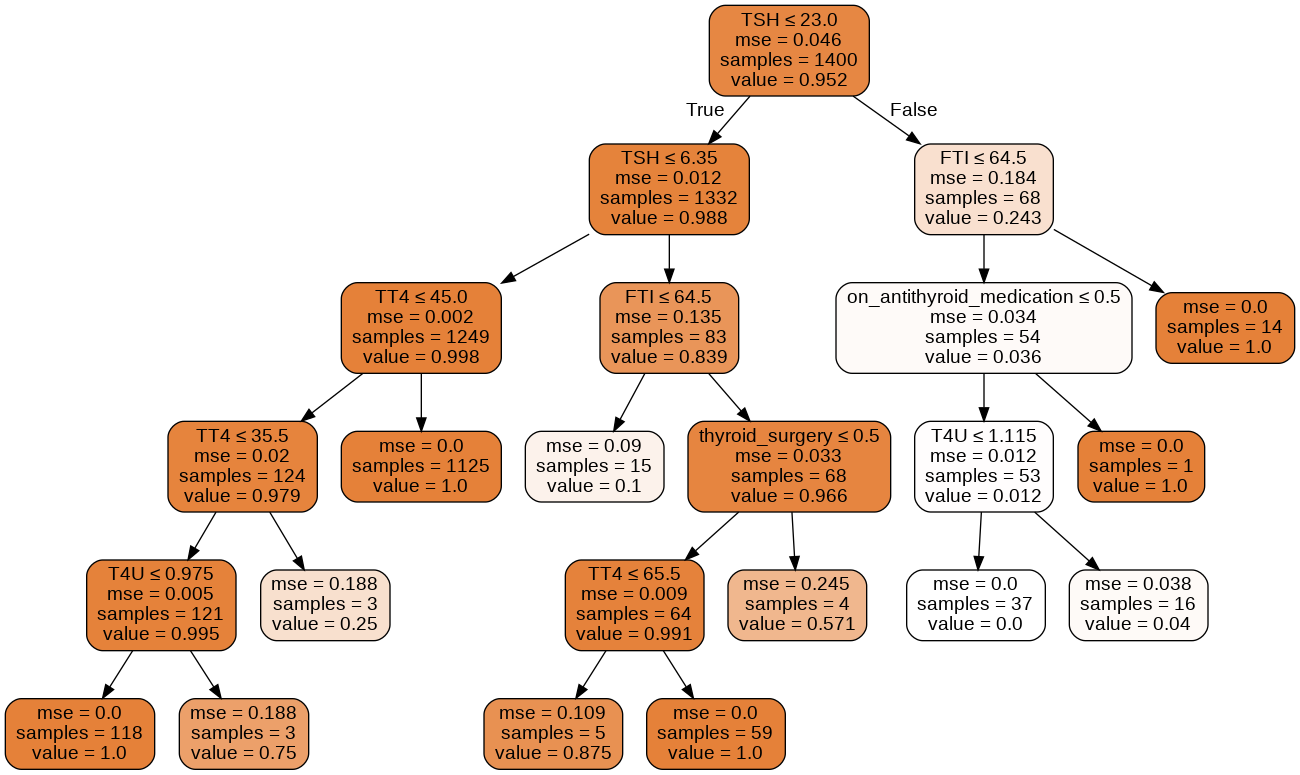

In [17]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid_forest.png')
Image(graph.create_png())

The model above has chosen for us features that are important. Lets visualize those features and see if the model has chosen the right ones  

In [18]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see
# when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.02), ('thyroid_surgery', 0.01), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.63), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.02), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.31), ('TBG_measured', 0.0), ('TBG', 0.0)]

Variable: TSH                  Importance: 0.63
Variable: FTI                  Importance: 0.31
Variable: on_antithyroid_medication Importance: 0.02
Variable: TT4                  Importance: 0.02
Variable: thyroid_surgery      Importance: 0.01
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable:

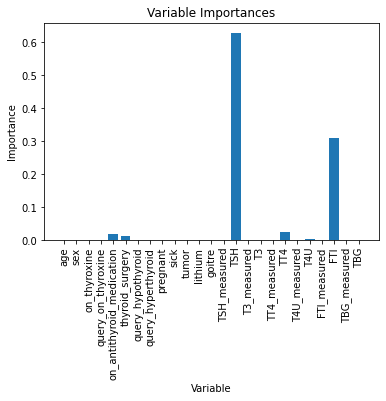

In [19]:

import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

From the graph its clear that we could only use 5 variables to predict the model(TSH,FTI,TT4,on_antithyroid_medication,thyroid_surgery)

**Gradient Boost**

In [20]:
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13)

params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}

In [22]:

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0116


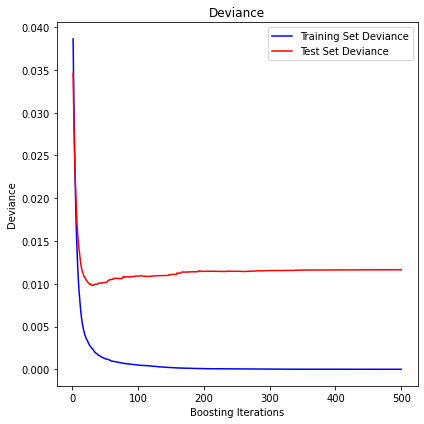

In [23]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Feature Importance (MDI)')

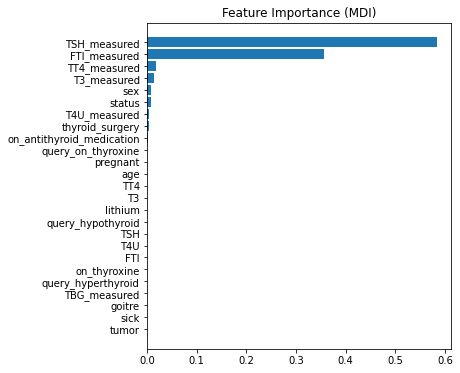

In [24]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(hyp.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

#Support Vector Machines

In [27]:
# I find it necessary to drop some of the features in our dataset 
# the feature importance is gonna help us

hyp1 = hyp.drop(columns=['tumor','sick','goitre','lithium'],axis=1)

In [28]:
hyp1.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,0,72.0,2,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,0,15.0,1,1,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,0,24.0,2,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,0,24.0,1,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,0,77.0,2,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [32]:
from sklearn.svm import SVC
# Specify the input for the model
x = hyp1[['TSH', 'FTI']].values
y = hyp['status']
# Convert the data type for 'Type' column from object to category
hyp1['status'] = hyp1['status'].astype('category')

# Convert each value in the 'Type' column into a number. This will be our target column
type_label =hyp1['status'].cat.codes
print(type_label)

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(x,y)

0       0
1       0
2       0
3       0
4       0
       ..
3158    1
3159    1
3160    1
3161    1
3162    1
Length: 3163, dtype: int8


**Polynomial Functions**

In [33]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [50]:
# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.966824644549763
[[ 18   8]
 [ 13 594]]


**Radial Basis Functions**

In [39]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [51]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [52]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9747235387045814
[[ 16  10]
 [  6 601]]
